Two data types: **vectors** and **nodes**.
Vectors can be:
- Atomic: all elements of the same type
- List
- NULL: generic zero-length vector

Vector attributes:
- Dimension
- Class: for OOP

**Atomic vectors**
- Logical (boolean)
- double (decimal, scientific (12.3E4), or hex)
- integer (L suffix)
- character (strings)
- complex
- raw (bytes)

In [1]:
?Quotes #how to represent various characters

In [2]:
x <- 3 #create a simple vector

In [3]:
x

[1] 3

In [6]:
str(x) #print the structure of x, 'num' = numeric

 num 3


In [7]:
class(x)

[1] "numeric"

In [8]:
typeof(x)

[1] "double"

In [9]:
length(x)

[1] 1

In [10]:
y <- 3L #integer
class(y)
typeof(y)
length(y)
str(y)

[1] "integer"

[1] "integer"

[1] 1

 int 3


In [11]:
z <- x>0 #create a logical vector
class(z)
typeof(z)
length(z)
str(z)

[1] "logical"

[1] "logical"

[1] 1

 logi TRUE


In [13]:
w <- 'three' #character
class(w)
typeof(w)
length(z)
str(z)

[1] "character"

[1] "character"

[1] 1

 logi TRUE


Scalar do not exist: they are one-element vectors

In [14]:
?c #concatenate function

In [16]:
x <- c(1)
str(x)

 num 1


In [19]:
x <- c(3, 5, 6, 3, 1, 2, -10)
str(x)
length(x)

 num [1:7] 3 5 6 3 1 2 -10


[1] 7

Vectors cannot be extended - you need to create a longer vector and then copy the older one.

In [23]:
0:10 #sequence (endpoints are included)

[1]  0  1  2  3  4  5  6  7  8  9 10

In [24]:
15:5 #backward sequence

[1] 15 14 13 12 11 10  9  8  7  6  5

In [26]:
seq(-2, 3, 0.5) #as in np.arange

[1] -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0

In [27]:
seq(from=0.04, to=0.15, length=6) #as np.linspace

[1] 0.040 0.062 0.084 0.106 0.128 0.150

In [28]:
rep(9, 5) #constant vectors

[1] 9 9 9 9 9

In [29]:
rep(1:4, 2) #replicate sequence (np.tile)

[1] 1 2 3 4 1 2 3 4

In [31]:
rep(1:4, each=2, times=3) #np.repeat + np.tile

[1] 1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4

In [33]:
rep(1:4, 1:4) #np.repeat with a np.arange

[1] 1 2 2 3 3 3 4 4 4 4

In [34]:
rep(c("cat", "dog", "mouse"), c(2,3,2))

[1] "cat"   "cat"   "dog"   "dog"   "dog"   "mouse" "mouse"

## Indeterminate forms

In [37]:
4/0

[1] Inf

In [39]:
-15/0

[1] -Inf

In [41]:
exp(-Inf) #infinity are propagated!

[1] 0

In [42]:
0/Inf

[1] 0

In [43]:
(0:3)^Inf

[1]   0   1 Inf Inf

In [44]:
0/0
Inf - Inf
Inf/Inf

[1] NaN

[1] NaN

[1] NaN

In [45]:
#Test infinites
x <- -4.5
is.finite(x)

is.infinite(c(-4.5, 0/0, exp(Inf)))

is.nan(c(-4.5, 0/0, exp(Inf)))

[1] TRUE

[1] FALSE FALSE  TRUE

[1] FALSE  TRUE FALSE

## Unknown values

In [47]:
#Missing data are represented as NA
NA > 0; 2.7*NA; ! NA #normally all operations on NA result in NA

[1] NA

[1] NA

[1] NA

In [48]:
#except for operations with a unique result
NA^0
NA |  TRUE
NA & FALSE

[1] 1

[1] TRUE

[1] FALSE

In [49]:
y <- c(4, NA, -8)

y == NA #does not work to check the NA
y == "NA" #NA is not a string!

#should use:
is.na(y)

[1] NA NA NA

[1] FALSE    NA FALSE

[1] FALSE  TRUE FALSE

In [50]:
#Remove NA
y[! is.na(y)]

[1]  4 -8

In [54]:
#Some operations can "skip" NAs
v1 <- c(1:7, NA, 2:8, NA, 3:9)
str(v1)

 int [1:23] 1 2 3 4 5 6 7 NA 2 3 ...


In [56]:
mean(y) #NA "ruin" the operation

[1] NA

In [58]:
mean(v1, na.rm=TRUE) #remove the NA before computing the mean

[1] 5

In [60]:
#Get indices of NAs
seq(along=v1) #create sequence of all indices

seq(along=v1)[is.na(v1)] #select only the ones that correspond to NAs

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

[1]  8 16

In [61]:
#or simpler way:
which(is.na(v1))

[1]  8 16

In [62]:
#Replace NAs with a value (e.g. 0)
v1[is.na(v1)] <- 0
v1

[1] 1 2 3 4 5 6 7 0 2 3 4 5 6 7 8 0 3 4 5 6 7 8 9

In [63]:
#Equivalently
v1[which(is.na(v1))] <- 0
v1

[1] 1 2 3 4 5 6 7 0 2 3 4 5 6 7 8 0 3 4 5 6 7 8 9

In [64]:
ifelse(is.na(v1), 0, v1) #vectorized ifelse (np.where)

[1] 1 2 3 4 5 6 7 0 2 3 4 5 6 7 8 0 3 4 5 6 7 8 9

In [65]:
probe <- 1:5

In [66]:
probe

[1] 1 2 3 4 5

In [69]:
probe[-1] #remove the first

[1] 2 3 4 5

In [70]:
#Create a function to remove the smallest two values and larges two values
trim <- function(x) {
    sort(x)[-c(1,2, length(x)-1, length(x))] #remove with the -
}

In [71]:
probe <- c(4, 7, 6, 5, 6, 7)
probe

[1] 4 7 6 5 6 7

In [72]:
trim(probe)

[1] 6 6

## Vectors attributes

In [73]:
counts <- c(25, 12, 7, 4, 6, 2, 1, 0, 2)
attr(counts, "nx") <- "count1"
attr(counts, "ny") <- "events"

In [74]:
attr(counts, "nx")

[1] "count1"

In [75]:
attributes(counts)

$nx
[1] "count1"

$ny
[1] "events"

Achtung! Many operations *destroy* attributes.

In [79]:
x <- c(a = 1, b = 2, c = 3)
str(x) #give names to the elements

 Named num [1:3] 1 2 3
 - attr(*, "names")= chr [1:3] "a" "b" "c"


In [81]:
x <- 1:3
names(x) <- c("a", "b", "c")
str(x)

 Named int [1:3] 1 2 3
 - attr(*, "names")= chr [1:3] "a" "b" "c"


In [82]:
x <- setNames(1:3, c("a", "b", "c"))
str(x)

 Named int [1:3] 1 2 3
 - attr(*, "names")= chr [1:3] "a" "b" "c"


In [83]:
names(x)

[1] "a" "b" "c"

In [85]:
#Remove
unname(x)

#or
names(x) <- NULL
str(x)

[1] 1 2 3

 int [1:3] 1 2 3


In [87]:
#for example, set names to represent histogram labels
counts <- c(25, 12, 7, 4, 6, 2, 1, 0, 2)
names(counts) <- 0:(length(counts)-1)
str(counts)

 Named num [1:9] 25 12 7 4 6 2 1 0 2
 - attr(*, "names")= chr [1:9] "0" "1" "2" "3" ...


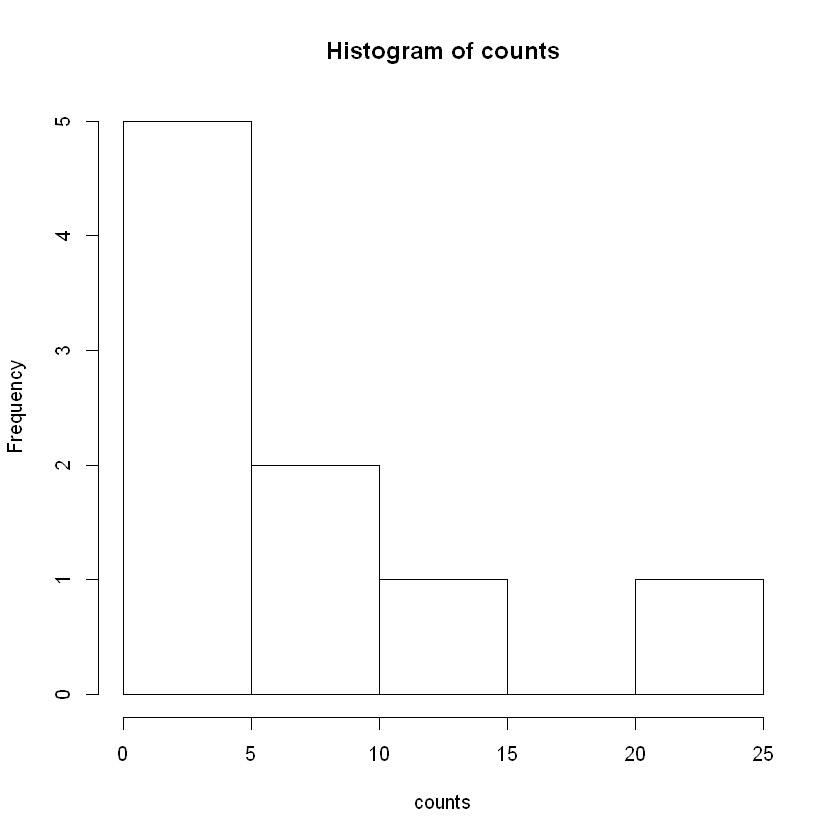

In [89]:
hist(counts) #does not use names

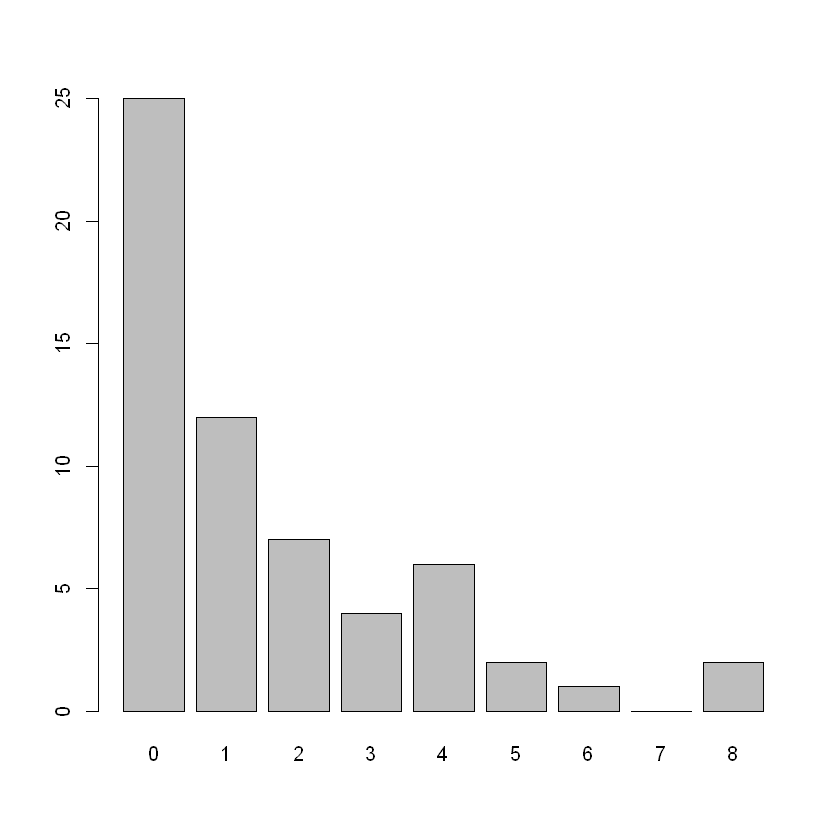

In [91]:
barplot(counts) #use names

In [92]:
v1 <- c(1:20)
dim(v1) <- c(4,5) #np.reshape to 2d array
class(v1)
str(v1)

[1] "matrix"

 int [1:4, 1:5] 1 2 3 4 5 6 7 8 9 10 ...


In [93]:
v1

1,5,9,13,17
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


In [98]:
v1 <- c(1:20)
dim(v1) <- c(2, 5, 2) #np.reshape to 3d array

str(v1)

 int [1:2, 1:5, 1:2] 1 2 3 4 5 6 7 8 9 10 ...


In [99]:
v1

, , 1

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    3    5    7    9
[2,]    2    4    6    8   10

, , 2

     [,1] [,2] [,3] [,4] [,5]
[1,]   11   13   15   17   19
[2,]   12   14   16   18   20

In [100]:
#Sum all elements less than 5
x <- 0:10
sum(x[x<5])

[1] 10

## S3 atomic vectors
S3 is the basic object system in R. 
- factor vectors (categorical data)
- Date vectors (day resolution)
- POSIXct/POSIXlt vectors (second resolution)
- difftime vectors (durations)


In [103]:
x <- factor(c("a", "b", "c", "d")) #factor
str(x)
typeof(x)
attributes(x)

 Factor w/ 4 levels "a","b","c","d": 1 2 3 4


[1] "integer"

$levels
[1] "a" "b" "c" "d"

$class
[1] "factor"

In [105]:
coord <- factor(c("Est", "West", "Est", "North"), levels = c("North", "Est", "South", "West"))
table(coord) #count occurrences

coord
North   Est South  West 
    1     2     0     1 

In [106]:
#ordered factors (when order matters)
#e.g. security level
grade <- ordered(c("high", "low", "medium", "medium"), levels = c("low", "medium", "high"))
str(grade)

 Ord.factor w/ 3 levels "low"<"medium"<..: 3 1 2 2


In [107]:
summary(grade)

low medium   high 
     1      2      1

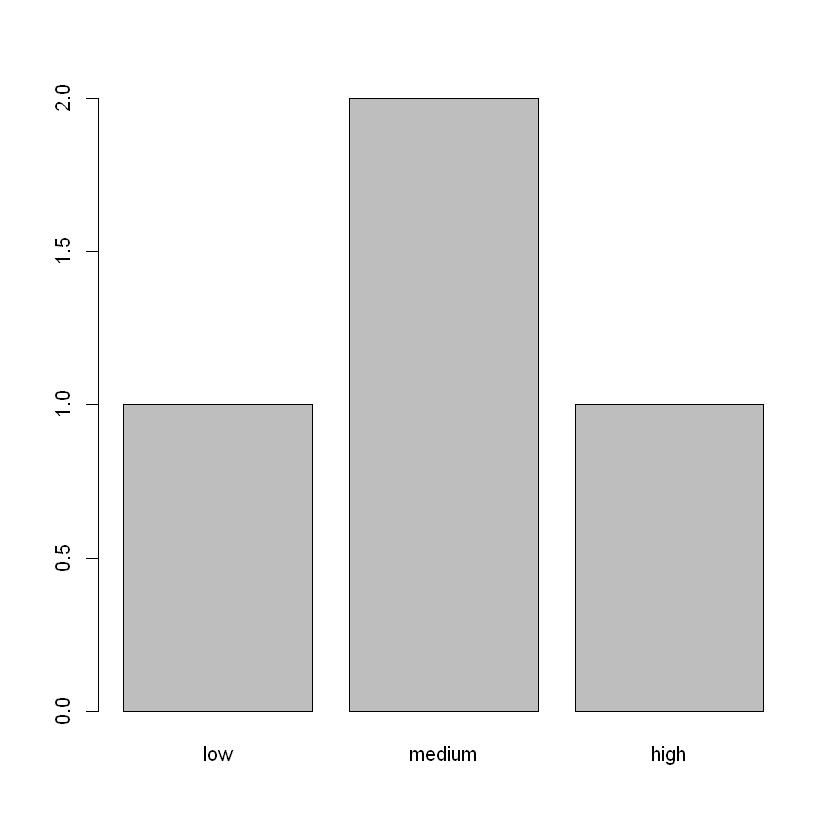

In [110]:
barplot(table(grade))

In [111]:
#read.csv(), data.frame(), etc. convert character vectors to factors. Can disable with stringsAsFactors = FALSE

In [112]:
today <- Sys.Date(); today #date

[1] "2020-03-16"

In [113]:
typeof(today)
class(today)

[1] "double"

[1] "Date"

In [114]:
yesterday <- as.Date("2020-03-14")
yesterday

[1] "2020-03-14"

In [116]:
delta <- today - yesterday
str(delta)
class(delta) #difftime

 'difftime' num 2
 - attr(*, "units")= chr "days"


[1] "difftime"

In [118]:
#internal representation is accessed with unclass
unclass(today) #= number of days since 1970-01-01

[1] 18337

In [119]:
#POSIX = Portable Operating System Interface, a standard from UNIX
#ct = calendar time (time_t in C)
#lt = local time    (struct_tm type in C)

In [120]:
now_ct <- as.POSIXct(Sys.time(), tzone="CET")
now_ct

[1] "2020-03-16 17:16:29 CET"

In [121]:
r20bday_ct <- as.POSIXct("2020-02-29 12:00", tzone="CET")
now_ct - r20bday_ct

Time difference of 16.21978 days

In [124]:
structure(now_ct, tzone="Europe/Rome")
structure(now_ct, tzone="Europe/Moscow") #edits only the formatting, not the internal representation
structure(now_ct, tzone="Asia/Chongqing")

[1] "2020-03-16 17:16:29 CET"

[1] "2020-03-16 19:16:29 MSK"

[1] "2020-03-17 00:16:29 CST"

In [127]:
#time durations
one_week <- as.difftime(1, units="weeks")
attributes(one_week)

$class
[1] "difftime"

$units
[1] "weeks"

In [129]:
today <- Sys.time()
next_week <- today + one_week
structure(next_week, tzone="Europe/Rome")

[1] "2020-03-23 17:19:15 CET"

In [130]:
forty_min <- as.difftime(40, units="mins")

## Unique and duplicated

In [131]:
names <- c("John", "John", "Jim", "Anna", "Beatrix", "Anna")
table(names)

names
   Anna Beatrix     Jim    John 
      2       1       1       2 

In [132]:
unique(names)

[1] "John"    "Jim"     "Anna"    "Beatrix"

In [133]:
duplicated(names) #mark elements that have appeared before

[1] FALSE  TRUE FALSE FALSE FALSE  TRUE

In [135]:
names[!duplicated(names)] #same as unique

[1] "John"    "Jim"     "Anna"    "Beatrix"

In [136]:
setA <- c("a", "b", "c", "d", "e")
setB <- c("d", "e", "f", "g")

union(setA, setB)

[1] "a" "b" "c" "d" "e" "f" "g"

In [137]:
intersect(setA, setB)

[1] "d" "e"

In [138]:
setdiff(setA, setB)

[1] "a" "b" "c"

In [139]:
setdiff(setB, setA)

[1] "f" "g"

In [140]:
setequal(setA, setA)
setequal(setA, setB)

[1] TRUE

[1] FALSE

In [141]:
setA %in% setB #marks elements in the intersection

[1] FALSE FALSE FALSE  TRUE  TRUE

In [146]:
9E-4/0.05

[1] 0.018